In [ ]:
#TO-DO
# Suggestions:
# -3) Are different adverse events reported in different countries?
#   --> make bar chart for REACTION for different countries
#   --> age splits
#   --> gender splits

# -2) What are the different adverse events associated with different disease areas? 
#   --> does disease area mean e.g. drugindication = RHEUMATOID ARTHRITIS
#   --> make bar-chart of REACTION for drugindiciation
#   --> make bar-chart of REACTION for most common drug(s) associated with particular indicatino
#   --> show gender splits?
#   --> show splits by age?

# -1) What drugs tend to be taken together? 
#   --> make list of drug incidence, find most common
#   --> make list of drug-pair incidence, find most common
#   --> make a correlation matrix of drugs

# Ben Ideas
#1. Find most common drugs for given drugindication
#2. For particular drug show N_adverse as a ftn of time/patient age
#3. Show N_adverse as a function of patient age/sex
#4. Show N_adverse as a function of dosage
#5. Learn what seriousness reporting means

In [1]:
import pandas as pd
import numpy as np
import json
import zipfile
from matplotlib import pyplot as plt

In [2]:
filename='/home/btannenw/Desktop/life/adverseDrugFDA/data/2011-Q3/drug-event-0001-of-0012.json.zip'
#jsonFile = json.loads(open(filename),)
#json.loads(data.decode("utf-8"))
#oneFile = pd.read_json('/home/btannenw/Desktop/life/adverseDrugFDA/data/2011-Q3/drug-event-0001-of-0012.json.zip', 
#                       encoding='utf-8', compression='zip')

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_widgets()

In [3]:
d = []
data = []

with zipfile.ZipFile(filename, 'r') as z:
    for filename in z.namelist():  
        print(filename)  
        with z.open(filename) as f:  
            data = f.read()  
            d = json.loads(data.decode("utf-8"))  

drug-event-0001-of-0012.json


In [4]:
d.keys()
#d['meta']

dict_keys(['meta', 'results'])

In [5]:
df = pd.DataFrame(d['results'])
df

,receivedate,patient,sender,transmissiondate,primarysource,receiptdate,transmissiondateformat,receiptdateformat,receiver,serious,receivedateformat,fulfillexpeditecriteria,safetyreportid,companynumb,seriousnessother,seriousnesshospitalization,seriousnessdeath,seriousnesslifethreatening,seriousnessdisabling,seriousnesscongenitalanomali
0,20111106,{'reaction': [{'reactionmeddrapt': 'SKIN DISCO...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110816,102,102,None,2,102,2,7894609-0,US-AMGEN-USASP2011041867,NaN,NaN,NaN,NaN,NaN,NaN
1,20111106,{'reaction': [{'reactionmeddrapt': 'MUSCULOSKE...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110817,102,102,None,2,102,2,7894626-0,US-AMGEN-USASP2011041937,NaN,NaN,NaN,NaN,NaN,NaN
2,20111106,{'reaction': [{'reactionmeddrapt': 'MUSCLE SPA...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110820,102,102,None,2,102,2,7894922-7,US-AMGEN-USASP2011042568,NaN,NaN,NaN,NaN,NaN,NaN
3,20111106,{'reaction': [{'reactionmeddrapt': 'SINUSITIS'...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110823,102,102,None,2,102,2,7895062-3,US-AMGEN-USASP2011043018,NaN,NaN,NaN,NaN,NaN,NaN
4,20111106,{'reaction': [{'reactionmeddrapt': 'OROPHARYNG...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110824,102,102,None,2,102,2,7895266-X,US-AMGEN-USASP2011043329,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20111106,{'reaction': [{'reactionmeddrapt': 'DIZZINESS'...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110907,102,102,None,2,102,2,7896210-1,US-AMGEN-USASP2011045766,NaN,NaN,NaN,NaN,NaN,NaN
11996,20111106,{'reaction': [{'reactionmeddrapt': 'INJECTION ...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110908,102,102,None,2,102,2,7896407-0,US-AMGEN-USASP2011046000,NaN,NaN,NaN,NaN,NaN,NaN
11997,20111106,{'reaction': [{'reactionmeddrapt': 'ARTHRALGIA...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110909,102,102,None,2,102,2,7896458-6,US-AMGEN-USASP2011046268,NaN,NaN,NaN,NaN,NaN,NaN
11998,20111216,{'reaction': [{'reactionmeddrapt': 'PANCREATIT...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110722,102,102,None,1,102,2,7986537-7,US-BRISTOL-MYERS SQUIBB COMPANY-15919855,1,NaN,NaN,NaN,NaN,NaN


In [162]:
#df_patient = pd.DataFrame([x for x in df['patient']])
#df_source = pd.DataFrame([x.get('reportercountry') for x in df['primarysource'] if x != None])
df_source = pd.DataFrame([x for x in df['primarysource'] if x != None])
df_sender = pd.DataFrame([x for x in df.sender if x != None])
df_patient = pd.DataFrame([x for x in df.patient if x != None])

In [260]:
def returnThresholdPoint(counts, labels, threshold, verbose=False):
    """return point where threshold"""

    # *** 0. Find threshold break
    _total = sum(counts)
    _processed = 0
    
    # *** 1. Escape for when you just want the top X in a list regardless of percentage
    if threshold > 1:
        if verbose:
            for iKey in range(0, threshold):
                print( "{}: {:1.2f}%".format(labels[iKey], 100*counts[iKey]/_total))
            print( "{}: {:1.2f}%".format('Other', 100*sum(counts[iKey:])/_total))

        return threshold
    
    # *** 2. Actually calculate point where > X% of sample contained
    for iKey in range(0, len(labels)):
        if _processed/_total < threshold:
            _processed += counts[iKey]
            if verbose:
                print( "{}: {:1.2f}%".format(labels[iKey], 100*counts[iKey]/_total))
                #print( "{}: {} {}".format(labels[iKey], counts[iKey], _total))
        else:
            break
    
    if verbose:
        print( "{}: {:1.2f}%".format('Other', 100*sum(counts[iKey:])/_total))
    
    return iKey


def makePiePlot(counts, labels, threshold=0.9, legend=True, verbose=False):
    """ make pie plot that lumps tail above some threshold into 'other' category """
    
    # *** 0. Find threshold break
    threshKey = returnThresholdPoint(counts, labels, threshold, verbose)
     
    # *** 1. Make counts/labels below threshold and store rest as 'Other'
    _pieCounts = counts.copy()[:threshKey]
    _pieCounts[-1] = sum(counts[threshKey:])
    _pieLabels = labels
    if type(_pieLabels)!=list:
        _pieLabels = _pieLabels.to_list()
    _pieLabels = _pieLabels[:threshKey]
    _pieLabels[-1] = 'Other'
    
    
    # *** 2. Remove 'Other' if top-X plot rather than with threshold
    if threshold > 1:
        _pieCounts = _pieCounts[:(threshKey-1)]
        _pieLabels = _pieLabels[:(threshKey-1)]

    # *** 3. Make pie plot
    #_colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #_explode = (0.0, ) + (0.2,)*(iKey-1) #explode all slices but one
    _pieOpts = dict(autopct='%1.1f%%', 
                shadow=True, 
                startangle=90
                #explode= _explode, 
                #labels= _pieLabels, 
                #colors= _colors, 
    )
    if not legend:
        _pieOpts['labels'] = _pieLabels
    
    plt.pie(_pieCounts, 
        **_pieOpts
        )
    
    if legend:
        plt.legend( _pieLabels, loc="best")

    plt.axis('equal')
    plt.show()

    
def returnCountsAndLabels(freqPair):
    """return easily digestible list of reactions and counts"""
    
    _reactions = [ pair[0] for pair in freqPair ]
    _counts    = [ int(pair[1]) for pair in freqPair ]
    
    return _reactions, _counts


def countUnique(reactionsList, threshold=0.90):
    
    # *** 0. Make pairs of uniques
    (unique, counts) = np.unique( reactionsList, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    #print(frequencies)
    freq2 = sorted( frequencies, key=lambda pair: int(pair[1]), reverse=True) 
    #print(freq2[:10])
    print( len(frequencies) )
    
    # *** 1. Find threshold break
    _reactions, _counts = returnCountsAndLabels( freq2)
    _threshKey = returnThresholdPoint(_counts, _reactions, threshold, True)

    
    return freq2[:_threshKey], freq2


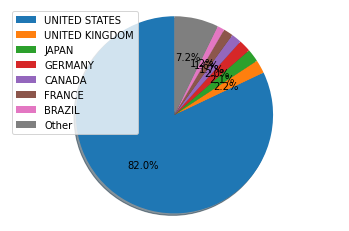

In [261]:
df_source.reportercountry.value_counts()

counts = df_source.reportercountry.value_counts().to_list()
countries = df_source.reportercountry.value_counts().keys()

makePiePlot(counts, countries, threshold=0.925)


In [381]:
df2 = df[ (df.primarysource != None) & ('reportercountry' in df.primarysource.keys())]
df3 = df.dropna(subset=['primarysource'])
df3_source = df3['primarysource'].apply(pd.Series)  

df4 = pd.concat([df3, df3_source], axis=1)
df5 = df4.dropna(subset=['reportercountry'])

#df5=df4
#df5['reportercountry'] = df4['primarysource'].get('reportercountry')
#df5 = df4[ df4.primarysource.get('reporterCountry')=='UNITED STATES']
#df4 = df3[ ('reportercountry' in df3.primarysource.keys())==True]

#mask = df[ len(df['primarysource'].keys())==2 ]
#df3['reportercountry'] = 
#indexNames = df[ df['Age'] == 30 ].index

#df_USA_patient = df_patientsubset=['reportercountry'])
#df_USA_patient = df2[ (df2.primarysource['reportercountry']=='UNITED STATES') ]
#mask_US = [ bool( x.get('reportercountry')=='UNITED STATES') for x in df2.primarysource]
#df2.primarysource.get('reportercountry')=='UNITED STATES'
#bool(df2.primarysource[0].get('reportercontry')=='UNITED STATES')
#'reportercounry' in df2['primarysource'][0]
#df3 = pd.DataFrame([x for x in df2 if 'reportercountry' in x['primarysource']])
#a=df.primarysource[0].get('reportercountry')
#a==None
print(len(df), len(df2), len(df3), len(df4), len(df5))

#for r in range(0, len(df3)): 
#    if 'reportercountry' not in df3.primarysource[r].keys():
#        print(df3.primarysource[r])


12000 0 11997 11997 11975


In [274]:
print(df.patient[0].keys())
print(df_sender.senderorganization.value_counts())

dict_keys(['reaction', 'patientonsetage', 'patientsex', 'patientonsetageunit', 'drug'])
FDA-Public Use    12000
Name: senderorganization, dtype: int64


In [270]:
print(df.patient[0]['patientonsetage'],'\n',
      df.patient[0]['patientsex'],'\n',
      df.patient[0]['patientonsetageunit'],'\n',
      df.patient[0]['drug'],'\n',
      df_patient.patientsex.value_counts(),'\n',
     )

50 
 2 
 801 
 [{'drugstartdateformat': '102', 'medicinalproduct': 'ENBREL', 'drugindication': 'RHEUMATOID ARTHRITIS', 'drugdosagetext': '50 MG, QWK', 'openfda': {'manufacturer_name': ['Immunex Corporation'], 'unii': ['OP401G7OJC'], 'product_type': ['HUMAN PRESCRIPTION DRUG'], 'rxcui': ['802652', '1653225', '809159', '809158', '2182340', '261105', '253014', '1653223', '727757', '2182338'], 'spl_set_id': ['a002b40c-097d-47a5-957f-7a7b1807af7f'], 'route': ['SUBCUTANEOUS'], 'generic_name': ['ETANERCEPT'], 'brand_name': ['ENBREL'], 'product_ndc': ['58406-456', '58406-455', '58406-446', '58406-435', '58406-032', '58406-425', '58406-445', '58406-010', '58406-044', '58406-021'], 'substance_name': ['ETANERCEPT'], 'spl_id': ['1bac748e-3ec9-4007-bd9a-541067a7567a'], 'application_number': ['BLA103795'], 'package_ndc': ['58406-044-01', '58406-424-01', '58406-910-01', '58406-425-41', '58406-456-04', '58406-456-01', '58406-021-01', '58406-446-01', '58406-446-04', '58406-021-04', '58406-044-04', '584

5374 32353 0


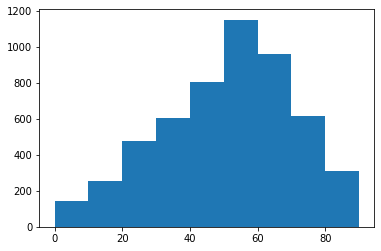

In [271]:
ages = [int(x) for x in df_patient.patientonsetage if not pd.isna(x)]
# assume ages >100 are something weird
a, b, c = plt.hist(ages, bins=np.arange(0, 100, 10))
print(len(ages), max(ages), min(ages))
# adverse affects peak around 50... is that weird?

In [272]:
reactions = [ reaction.get('reactionmeddrapt') for patient in df.patient for reaction in patient['reaction']]
#get list of all reactions
print( len(reactions), len(set(reactions)))
# shows that there's a lot of reactions (~35k) and a lot of unique reactions (~3k). but since the number of unique
# is so much smaller, that means there should be a lot of correlation --> matrix

35748 3170


In [9]:
# drop events with NaN onset ages and store as int
df_patient = df_patient.dropna(subset=['patientonsetage'])
df_patient['patientonsetage'] = df_patient.patientonsetage.astype(int)
# make three age categories
df_patient_onsetage_50to60 = df_patient[ (df_patient.patientonsetage > 50) & (df_patient.patientonsetage < 60)]
df_patient_onsetage_over65 = df_patient[ (df_patient.patientonsetage > 65) & (df_patient.patientonsetage < 110)]
df_patient_onsetage_under45 = df_patient[ (df_patient.patientonsetage < 45)]
# make reactions based on age category
reactions_50to60 = [ r.get('reactionmeddrapt') for reaction in df_patient_onsetage_50to60.reaction for r in reaction]
reactions_over65 = [ r.get('reactionmeddrapt') for reaction in df_patient_onsetage_over65.reaction for r in reaction]
reactions_under45 = [ r.get('reactionmeddrapt') for reaction in df_patient_onsetage_under45.reaction for r in reaction]

In [251]:
threshold=10
top10_under45, all_under45 = countUnique(reactions_under45, threshold)
top10_50to60, all_50to60 = countUnique(reactions_50to60, threshold)
top10_over65, all_over65 = countUnique(reactions_over65, threshold)

top10_reactions_under45, top10_counts_under45 = returnCountsAndLabels( top10_under45)
top10_reactions_50t060, top10_counts_50t060 = returnCountsAndLabels( top10_50to60)
top10_reactions_over65, top10_counts_over65 = returnCountsAndLabels( top10_over65)

all_reactions_under45, all_counts_under45 = returnCountsAndLabels( all_under45)
all_reactions_50t060, all_counts_50t060 = returnCountsAndLabels( all_50to60)
all_reactions_over65, all_counts_over65 = returnCountsAndLabels( all_over65)

1364
INJECTION SITE PAIN: 2.44%
DEVICE EXPULSION: 2.31%
INJECTION SITE ERYTHEMA: 1.77%
NAUSEA: 1.77%
HEADACHE: 1.49%
FATIGUE: 1.40%
DRUG INEFFECTIVE: 1.34%
PYREXIA: 1.04%
INJECTION SITE SWELLING: 1.02%
VOMITING: 0.93%
Other: 85.42%
927
INJECTION SITE PAIN: 2.41%
DRUG INEFFECTIVE: 1.77%
NAUSEA: 1.68%
HEADACHE: 1.64%
DIARRHOEA: 1.58%
FATIGUE: 1.43%
INJECTION SITE ERYTHEMA: 1.40%
PAIN: 1.37%
ARTHRALGIA: 1.22%
PAIN IN EXTREMITY: 1.10%
Other: 85.50%
1138
DRUG INEFFECTIVE: 1.67%
NAUSEA: 1.19%
ARTHRALGIA: 1.14%
FALL: 1.11%
DIARRHOEA: 1.09%
DEATH: 1.06%
DYSPNOEA: 0.98%
FATIGUE: 0.98%
RENAL FAILURE ACUTE: 0.98%
ASTHENIA: 0.96%
Other: 89.79%


In [252]:
topReactions_allAges = list(set(top10_reactions_under45 + top10_reactions_50to60 + top10_reactions_over65))
topReactions_allAges

['NAUSEA',
 'DEATH',
 'FATIGUE',
 'VOMITING',
 'PAIN',
 'DEVICE EXPULSION',
 'ARTHRALGIA',
 'PAIN IN EXTREMITY',
 'FALL',
 'INJECTION SITE ERYTHEMA',
 'INJECTION SITE PAIN',
 'INJECTION SITE SWELLING',
 'DRUG INEFFECTIVE',
 'RENAL FAILURE ACUTE',
 'DYSPNOEA',
 'HEADACHE',
 'ASTHENIA',
 'DIARRHOEA',
 'PYREXIA']

<BarContainer object of 10 artists>

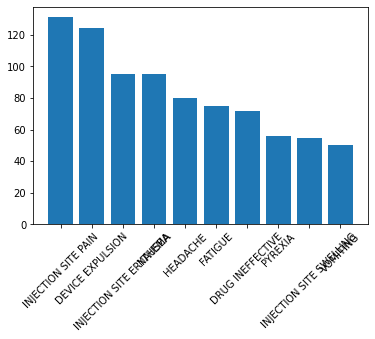

In [253]:
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 10})
plt.bar( top10_reactions_under45, top10_counts_under45)

In [35]:
#maybe think of some way to store original tuple as dict and then plot n_reactions/n_population for three age groups
# then compare a few common reactions across ages

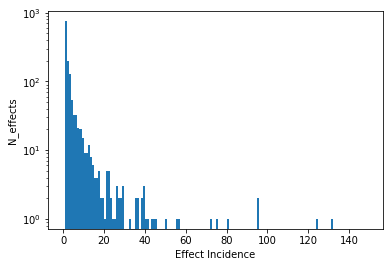

In [285]:
bins=np.arange(0, 150, 1)
plt.hist( all_counts_under45, bins=bins)
plt.xlabel('Effect Incidence')
plt.ylabel('N_effects')
plt.yscale('log')
#turns out most reactions only have < 10 recorded instances. probably focus on things that are much more common

INJECTION SITE PAIN: 2.44%
DEVICE EXPULSION: 2.31%
INJECTION SITE ERYTHEMA: 1.77%
NAUSEA: 1.77%
HEADACHE: 1.49%
FATIGUE: 1.40%
DRUG INEFFECTIVE: 1.34%
PYREXIA: 1.04%
INJECTION SITE SWELLING: 1.02%
VOMITING: 0.93%
Other: 85.42%


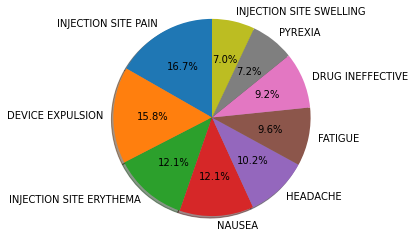

In [286]:
makePiePlot(all_counts_under45, all_reactions_under45, threshold=10, legend=False, verbose=True)

In [ ]:
result = [(x, y) for x, y in zip(df['col1'], df['col2'])]

In [357]:
df3

,receivedate,patient,sender,transmissiondate,primarysource,receiptdate,transmissiondateformat,receiptdateformat,receiver,serious,receivedateformat,fulfillexpeditecriteria,safetyreportid,companynumb,seriousnessother,seriousnesshospitalization,seriousnessdeath,seriousnesslifethreatening,seriousnessdisabling,seriousnesscongenitalanomali
0,20111106,{'reaction': [{'reactionmeddrapt': 'SKIN DISCO...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110816,102,102,None,2,102,2,7894609-0,US-AMGEN-USASP2011041867,NaN,NaN,NaN,NaN,NaN,NaN
1,20111106,{'reaction': [{'reactionmeddrapt': 'MUSCULOSKE...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110817,102,102,None,2,102,2,7894626-0,US-AMGEN-USASP2011041937,NaN,NaN,NaN,NaN,NaN,NaN
2,20111106,{'reaction': [{'reactionmeddrapt': 'MUSCLE SPA...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110820,102,102,None,2,102,2,7894922-7,US-AMGEN-USASP2011042568,NaN,NaN,NaN,NaN,NaN,NaN
3,20111106,{'reaction': [{'reactionmeddrapt': 'SINUSITIS'...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110823,102,102,None,2,102,2,7895062-3,US-AMGEN-USASP2011043018,NaN,NaN,NaN,NaN,NaN,NaN
4,20111106,{'reaction': [{'reactionmeddrapt': 'OROPHARYNG...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110824,102,102,None,2,102,2,7895266-X,US-AMGEN-USASP2011043329,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20111106,{'reaction': [{'reactionmeddrapt': 'DIZZINESS'...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110907,102,102,None,2,102,2,7896210-1,US-AMGEN-USASP2011045766,NaN,NaN,NaN,NaN,NaN,NaN
11996,20111106,{'reaction': [{'reactionmeddrapt': 'INJECTION ...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110908,102,102,None,2,102,2,7896407-0,US-AMGEN-USASP2011046000,NaN,NaN,NaN,NaN,NaN,NaN
11997,20111106,{'reaction': [{'reactionmeddrapt': 'ARTHRALGIA...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110909,102,102,None,2,102,2,7896458-6,US-AMGEN-USASP2011046268,NaN,NaN,NaN,NaN,NaN,NaN
11998,20111216,{'reaction': [{'reactionmeddrapt': 'PANCREATIT...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110722,102,102,None,1,102,2,7986537-7,US-BRISTOL-MYERS SQUIBB COMPANY-15919855,1,NaN,NaN,NaN,NaN,NaN
